In [1]:
import pandas as pd
import numpy as np

In [2]:
total_crop_dataset = pd.read_csv('crop_production.csv')

In [3]:
maharashtra = total_crop_dataset[total_crop_dataset['State_Name']=='Maharashtra']

In [4]:
maharashtra.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
125191,Maharashtra,AHMEDNAGAR,1997,Autumn,Maize,1.0,1113.0
125192,Maharashtra,AHMEDNAGAR,1997,Kharif,Arhar/Tur,17600.0,6300.0
125193,Maharashtra,AHMEDNAGAR,1997,Kharif,Bajra,274100.0,152800.0
125194,Maharashtra,AHMEDNAGAR,1997,Kharif,Gram,40800.0,18600.0
125195,Maharashtra,AHMEDNAGAR,1997,Kharif,Jowar,900.0,1100.0


In [5]:
maharashtra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12628 entries, 125191 to 137818
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     12628 non-null  object 
 1   District_Name  12628 non-null  object 
 2   Crop_Year      12628 non-null  int64  
 3   Season         12628 non-null  object 
 4   Crop           12628 non-null  object 
 5   Area           12628 non-null  float64
 6   Production     12496 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 789.2+ KB


In [6]:
maharashtra.isnull().sum()

State_Name         0
District_Name      0
Crop_Year          0
Season             0
Crop               0
Area               0
Production       132
dtype: int64

In [7]:
maharashtra = maharashtra.dropna()

In [8]:
maharashtra['District_Name'].nunique()

35

In [9]:
maharashtra_filtered = maharashtra[
    (maharashtra['Crop']=='Wheat') | 
    (maharashtra['Crop']=='Rice')  |
    (maharashtra['Crop']=='Jowar')  |
    (maharashtra['Crop']=='Bajra')  |
    (maharashtra['Crop']=='Cardamom')  |
    (maharashtra['Crop']=='Garlic')  |
    (maharashtra['Crop']=='Turmeric')  |
    (maharashtra['Crop']=='Ginger')  |
    (maharashtra['Crop']=='Cotton(lint)')  |
    (maharashtra['Crop']=='Linseed')  |
    (maharashtra['Crop']=='Sesamum')  |
    (maharashtra['Crop']=='Coconut ')  |
    (maharashtra['Crop']=='Onion')  |
    (maharashtra['Crop']=='Arhar/Tur')  |
    (maharashtra['Crop']=='Potato')  |
    (maharashtra['Crop']=='Maize')  
]

In [10]:
maharashtra_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5465 entries, 125191 to 137816
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     5465 non-null   object 
 1   District_Name  5465 non-null   object 
 2   Crop_Year      5465 non-null   int64  
 3   Season         5465 non-null   object 
 4   Crop           5465 non-null   object 
 5   Area           5465 non-null   float64
 6   Production     5465 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 341.6+ KB


In [12]:
maharashtra_filtered_ohe = pd.get_dummies(maharashtra, columns=['District_Name', 'Season','Crop'],drop_first=True)

In [13]:
maharashtra_filtered_ohe.head()

,State_Name,Crop_Year,Area,Production,District_Name_AKOLA,District_Name_AMRAVATI,District_Name_AURANGABAD,District_Name_BEED,District_Name_BHANDARA,District_Name_BULDHANA,...,Crop_Small millets,Crop_Soyabean,Crop_Sugarcane,Crop_Sunflower,Crop_Tobacco,Crop_Tomato,Crop_Total foodgrain,Crop_Urad,Crop_Wheat,Crop_other oilseeds
125191,Maharashtra,1997,1.0,1113.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125192,Maharashtra,1997,17600.0,6300.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125193,Maharashtra,1997,274100.0,152800.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125194,Maharashtra,1997,40800.0,18600.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125195,Maharashtra,1997,900.0,1100.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
maharashtra_filtered_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12496 entries, 125191 to 137818
Data columns (total 75 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   State_Name                    12496 non-null  object 
 1   Crop_Year                     12496 non-null  int64  
 2   Area                          12496 non-null  float64
 3   Production                    12496 non-null  float64
 4   District_Name_AKOLA           12496 non-null  uint8  
 5   District_Name_AMRAVATI        12496 non-null  uint8  
 6   District_Name_AURANGABAD      12496 non-null  uint8  
 7   District_Name_BEED            12496 non-null  uint8  
 8   District_Name_BHANDARA        12496 non-null  uint8  
 9   District_Name_BULDHANA        12496 non-null  uint8  
 10  District_Name_CHANDRAPUR      12496 non-null  uint8  
 11  District_Name_DHULE           12496 non-null  uint8  
 12  District_Name_GADCHIROLI      12496 non-null  uint8  


In [15]:
X = maharashtra_filtered_ohe.drop(['State_Name','Crop_Year','Production'],axis=1).values
y = maharashtra_filtered_ohe.iloc[:,3].values

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [17]:
from sklearn.linear_model import LinearRegression,Lasso
linear_regression = LinearRegression()
lasso = Lasso(alpha=100,max_iter=10000)

In [18]:
linear_regression.fit(X_train,y_train)
lasso.fit(X_train,y_train)

Lasso(alpha=100, max_iter=10000)

In [19]:
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor()

In [20]:
rfregressor.fit(X_train,y_train)

RandomForestRegressor()

In [26]:
y_pred = rfregressor.predict(X_test)

In [22]:
accuracy = rfregressor.score(X_test,y_test)
print(accuracy*100,'%')

95.78010668121941 %


In [23]:
accuracy = lasso.score(X_test,y_test)
print(accuracy*100,'%')

32.092356049642405 %


In [24]:
accuracy = linear_regression.score(X_test,y_test)
print(accuracy*100,'%')

32.15746198889591 %


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

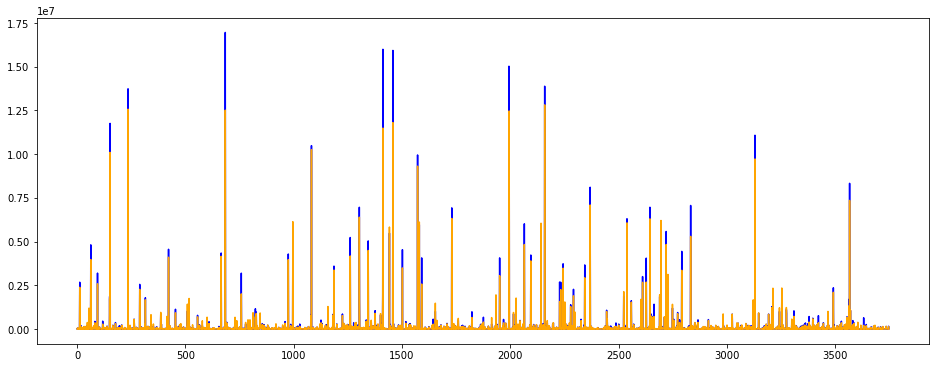

In [28]:
plt.figure(figsize=(16,6))
plt.plot(y_test,color='blue')
plt.plot(y_pred,color='orange')